In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
trnImages = np.load('trnImage.npy')
tstImages = np.load('tstImage.npy')
trnLabels = np.load('trnLabel.npy').reshape(-1)
tstLabels = np.load('tstLabel.npy').reshape(-1)

In [3]:
def computeFeatures(image):
    #This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    #By setting visualize=True we obtain an image,hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature = skimage.feature.hog(image, visualize=False, block_norm='L2-Hys')
    return hog_feature

In [4]:
train_num_images = trnImages[0,0,0,:].size
train_hog_features = np.zeros((train_num_images, 324))
for i in range(0, train_num_images, 1):
    train_hog_features[i] = skimage.feature.hog(trnImages[:,:,:,i], visualize=False, block_norm='L2-Hys')

test_num_images = tstImages[0,0,0,:].size
test_hog_features = np.zeros((test_num_images, 324))
for i in range(0, test_num_images, 1):
    test_hog_features[i] = skimage.feature.hog(tstImages[:,:,:,i], visualize=False, block_norm='L2-Hys')

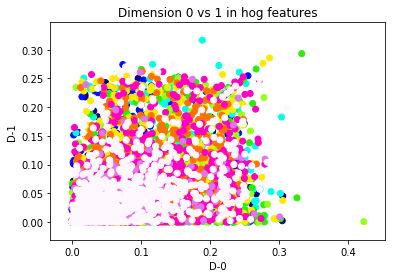

In [5]:
plt.figure()
plt.scatter(train_hog_features[:,0], train_hog_features[:,1], c=trnLabels, cmap='gist_ncar', marker = 'o')#, c=y, 
plt.xlabel("D-0")
plt.ylabel("D-1")
plt.title("Dimension 0 vs 1 in hog features")
plt.show()

LDA:   Percentage accuracy on testing set is: 49.40%
(9,)


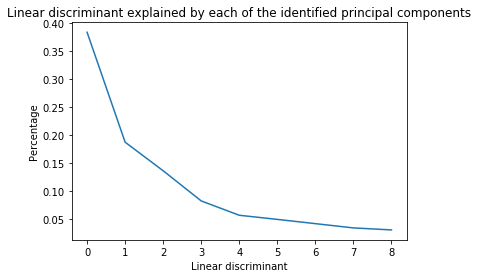

SVM:   Percentage accuracy on testing set is: 50.50%
GMM:   Percentage accuracy on testing set is: 7.90%
KM:    Percentage accuracy on testing set is: 3.40%
LRegr: Percentage accuracy on testing set is: 12.90%


In [6]:
components = 9
lda = LinearDiscriminantAnalysis(n_components=components)
lda.fit(train_hog_features, trnLabels)
lda_train_projected_data = lda.transform(train_hog_features)
lda_test_projected_data = lda.transform(test_hog_features)

test_pred = lda.predict(test_hog_features)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('LDA:   Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

print(lda.explained_variance_ratio_.shape)

plt.figure()
plt.plot(lda.explained_variance_ratio_)
plt.xticks(range(0, components))
plt.xlabel('Linear discriminant')
plt.ylabel('Percentage')
plt.title('Linear discriminant explained by each of the identified principal components')
plt.show(block=False)

#plt.figure()
#plt.scatter(lda_train_projected_data[:,0], lda_train_projected_data[:,1], c=trnLabels, cmap='gist_ncar', marker = 'o')
#plt.xlabel("LD-1")
#plt.ylabel("LD-2")
#plt.title("Data in new Linear discriminant space")
#plt.show()

#==============================================

C = 1
svc = SVC(kernel='rbf', C=C, gamma='scale')# linear / rbf / poly

svc.fit(lda_train_projected_data, trnLabels)

test_pred = svc.predict(lda_test_projected_data)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('SVM:   Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

#=============================================

gmm = GaussianMixture(n_components=10)
gmm.fit(lda_train_projected_data)

train_pred = gmm.predict(lda_train_projected_data)
test_pred = gmm.predict(lda_test_projected_data)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('GMM:   Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

#===================================================
kmeans = KMeans(n_clusters=10)
kmeans.fit(lda_train_projected_data)

test_pred = kmeans.predict(lda_test_projected_data)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('KM:    Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

#=================================================
regr = LinearRegression()
regr.fit(lda_train_projected_data, trnLabels)

test_pred = regr.predict(lda_test_projected_data).round(0)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('LRegr: Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))


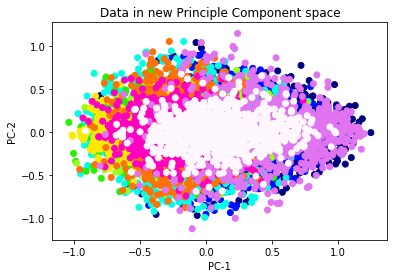

In [7]:
pca = PCA(n_components=2)
pca.fit(train_hog_features)
projected_data = pca.transform(train_hog_features)

plt.figure()
plt.scatter(projected_data[:,0], projected_data[:,1], c=trnLabels, cmap='gist_ncar', marker = 'o')#, c=y, 
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("Data in new Principle Component space")
plt.show()

In [8]:
C = 1
svc = SVC(kernel='linear', C=C)

svc.fit(train_hog_features, trnLabels)

y_pred = svc.predict(test_hog_features)

accuracy = np.sum(np.equal(tstLabels, y_pred)) / tstLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 51.40%


In [9]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(train_hog_features)

test_pred = kmeans.predict(test_hog_features)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 9.60%


In [10]:
gmm = GaussianMixture(n_components=10)
gmm.fit(train_hog_features)

train_pred = gmm.predict(train_hog_features)
test_pred = gmm.predict(test_hog_features)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 14.10%


In [11]:
regr = LinearRegression()
regr.fit(train_hog_features, trnLabels)

test_pred = regr.predict(test_hog_features).round(0)

accuracy = np.sum(np.equal(tstLabels, test_pred)) / tstLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 12.90%
